<a href="https://colab.research.google.com/github/calvinjhill/test_repo/blob/main/NBA_Notebook3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
###### DO NOT RUN ALL #######
# all nba data excel file will be overwritten

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
%cd /content/drive/My Drive/CS 625/project/hw7

/content/drive/My Drive/CS 625/project/hw7


In [56]:
!pip install chart_studio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

#import plotly.offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
nba_21_22 = pd.read_csv('21-22_nba_stats.csv')
nba_21_22 = nba_21_22.drop(labels='Rk',axis=1)
nba_21_22 = nba_21_22.rename(columns={"3P%?": "3P%"})

In [58]:
nba_21_22.head()

,Team,Season,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Miami Heat*,2021-2022,82,242.1,39.6,84.8,0.467,13.6,35.8,0.379,26.0,49.0,0.531,17.3,21.4,0.808,9.8,33.9,43.7,25.5,7.4,3.2,14.6,20.5,110.0
1,Atlanta Hawks*,2021-2022,82,240.3,41.5,88.3,0.470,12.9,34.4,0.374,28.6,53.9,0.531,18.1,22.3,0.812,10.0,33.9,44.0,24.6,7.2,4.2,11.9,18.7,113.9
2,Los Angeles Clippers,2021-2022,82,241.2,40.1,87.4,0.458,12.8,34.2,0.374,27.3,53.3,0.512,15.5,19.6,0.793,9.1,34.9,44.0,24.0,7.4,5.0,13.7,18.6,108.4
3,Chicago Bulls*,2021-2022,82,240.6,41.7,86.9,0.480,10.6,28.8,0.369,31.1,58.1,0.535,17.5,21.5,0.813,8.7,33.7,42.3,23.9,7.1,4.1,12.8,18.8,111.6
4,Milwaukee Bucks*,2021-2022,82,240.9,41.8,89.4,0.468,14.1,38.4,0.366,27.8,51.0,0.544,17.8,22.9,0.776,10.2,36.5,46.7,23.9,7.6,4.0,13.4,18.2,115.5


In [59]:
nba_12_13 = pd.read_csv('12-13_nba_stats.csv')
nba_13_14 = pd.read_csv('13-14_nba_stats.csv')
nba_14_15 = pd.read_csv('14-15_nba_stats.csv')
nba_15_16 = pd.read_csv('15-16_nba_stats.csv')
nba_16_17 = pd.read_csv('16-17_nba_stats.csv')
nba_17_18 = pd.read_csv('17-18_nba_stats.csv')
nba_18_19 = pd.read_csv('18-19_nba_stats.csv')
nba_19_20 = pd.read_csv('19-20_nba_stats.csv')
nba_20_21 = pd.read_csv('20-21_nba_stats.csv')

In [60]:
last_10_seasons = [nba_12_13, nba_13_14, nba_14_15, nba_15_16, nba_16_17, nba_17_18, nba_18_19, nba_19_20, nba_20_21, nba_21_22]

In [61]:
nba_data = pd.concat(last_10_seasons)

In [62]:
nba_data = nba_data.drop(labels='Rk',axis=1)

### Print DataFrame to Excel

In [63]:
""" prints DataFrame to Excel
this was used to convert merged individual seasons df to excel file
excel was necessary in order to add w/l data to file
# commented out to prevent overwriting data"""
# nba_data.to_excel('all_nba_data.xlsx', index=False)

' prints DataFrame to Excel\nthis was used to convert merged individual seasons df to excel file\nexcel was necessary in order to add w/l data to file\n# commented out to prevent overwriting data'

In [64]:
nba_data.head()

,Team,Season,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Denver Nuggets*,2012-2013,82,242.7,40.7,85.2,0.478,6.4,18.5,0.343,34.4,66.6,0.516,18.4,26.2,0.701,13.3,31.7,45.0,24.4,9.3,6.5,15.3,20.5,106.1
1,Houston Rockets*,2012-2013,82,241.2,38.1,82.7,0.461,10.6,28.9,0.366,27.5,53.8,0.511,19.2,25.5,0.754,11.1,32.3,43.4,23.2,8.3,4.4,16.4,20.3,106.0
2,Oklahoma City Thunder*,2012-2013,82,241.8,38.1,79.3,0.481,7.3,19.4,0.377,30.8,60.0,0.514,22.2,26.8,0.828,10.4,33.2,43.6,21.4,8.3,7.6,15.3,20.2,105.7
3,San Antonio Spurs*,2012-2013,82,242.4,39.1,81.4,0.481,8.1,21.5,0.376,31.1,59.9,0.519,16.6,21.0,0.791,8.1,33.2,41.3,25.1,8.5,5.4,14.7,17.4,103.0
4,Miami Heat*,2012-2013,82,242.4,38.4,77.4,0.496,8.7,22.1,0.396,29.6,55.4,0.536,17.4,23.0,0.754,8.2,30.4,38.6,23.0,8.7,5.4,13.9,18.7,102.9


In [65]:
# dataframe for league averages for last 10 seasons
league_avg = nba_data.loc[nba_data['Team'] == 'League Average']

In [66]:
league_avg

,Team,Season,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
30,League Average,2012-2013,82,241.9,37.1,82.0,0.453,7.2,20.0,0.359,30.0,62.1,0.483,16.7,22.2,0.753,11.2,31.0,42.1,22.1,7.8,5.1,14.6,19.8,98.1
30,League Average,2013-2014,82,242.0,37.7,83.0,0.454,7.7,21.5,0.360,30.0,61.5,0.488,17.8,23.6,0.756,10.9,31.8,42.7,22.0,7.7,4.7,14.6,20.7,101.0
30,League Average,2014-2015,82,242.0,37.5,83.6,0.449,7.8,22.4,0.350,29.7,61.2,0.485,17.1,22.8,0.750,10.9,32.4,43.3,22.0,7.7,4.8,14.4,20.2,100.0
30,League Average,2015-2016,82,241.8,38.2,84.6,0.452,8.5,24.1,0.354,29.7,60.5,0.491,17.7,23.4,0.757,10.4,33.3,43.8,22.3,7.8,5.0,14.4,20.3,102.7
30,League Average,2016-2017,82,241.6,39.0,85.4,0.457,9.7,27.0,0.358,29.4,58.4,0.503,17.8,23.1,0.772,10.1,33.4,43.5,22.6,7.7,4.7,14.0,19.9,105.6
30,League Average,2017-2018,82,241.4,39.6,86.1,0.460,10.5,29.0,0.362,29.1,57.1,0.510,16.6,21.7,0.767,9.7,33.8,43.5,23.2,7.7,4.8,14.3,19.9,106.3
30,League Average,2018-2019,82,241.6,41.1,89.2,0.461,11.4,32.0,0.355,29.7,57.2,0.520,17.7,23.1,0.766,10.3,34.8,45.2,24.6,7.6,5.0,14.1,20.9,111.2
30,League Average,2019-2020,71,241.8,40.9,88.8,0.460,12.2,34.1,0.358,28.7,54.7,0.524,17.9,23.1,0.773,10.1,34.8,44.8,24.4,7.6,4.9,14.5,20.8,111.8
30,League Average,2020-2021,72,241.4,41.2,88.4,0.466,12.7,34.6,0.367,28.5,53.8,0.530,17.0,21.8,0.778,9.8,34.5,44.3,24.8,7.6,4.9,13.8,19.3,112.1
30,League Average,2021-2022,82,241.4,40.6,88.1,0.461,12.4,35.2,0.354,28.2,52.9,0.533,16.9,21.9,0.775,10.3,34.1,44.5,24.6,7.6,4.7,13.8,19.6,110.6


### 3PA Over Last 10 Seasons Line chart

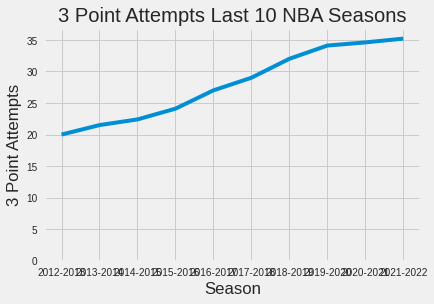

In [67]:
season = league_avg['Season']
three_percentage = league_avg['3P%']
three_attempts = league_avg['3PA']

plt.style.use('fivethirtyeight')

plt.plot(season, three_attempts, label='3 Point Attempts')

#plt.legend()

plt.title("3 Point Attempts Last 10 NBA Seasons")
plt.xlabel("Season")
plt.ylabel("3 Point Attempts")
plt.ylim(0, 1.05 * max(three_attempts))
# plt.tick_params(axis='x', pad= .5, labelsize='small', )
# plt.ticklabel_format(useOffset=True)

plt.show()

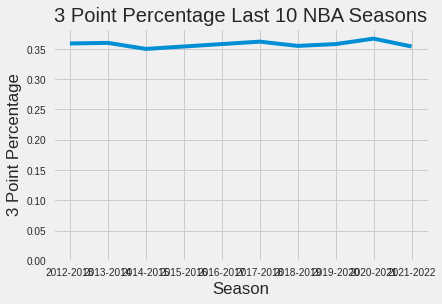

In [68]:
plt.style.use('fivethirtyeight')

plt.plot(season, three_percentage, label='3 Point %')

#plt.legend()

plt.title("3 Point Percentage Last 10 NBA Seasons")
plt.xlabel("Season")
plt.ylabel("3 Point Percentage")
plt.ylim(0, 1.05 * max(three_percentage))

plt.show()

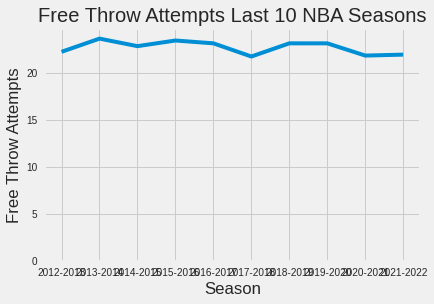

In [69]:
season = league_avg['Season']
ft_percentage = league_avg['FT%']
ft_attempts = league_avg['FTA']

plt.style.use('fivethirtyeight')

plt.plot(season, ft_attempts, label='Free Throw Attempts')
#plt.plot(season, three_percentage, label='3 Point %')

#plt.legend()

plt.title("Free Throw Attempts Last 10 NBA Seasons")
plt.xlabel("Season")
plt.ylabel("Free Throw Attempts")
plt.ylim(0, 1.05 * max(ft_attempts))

plt.show()

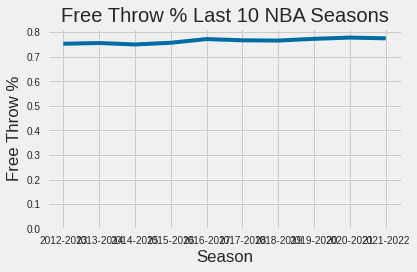

In [70]:
season = league_avg['Season']
ft_percentage = league_avg['FT%']
ft_attempts = league_avg['FTA']

plt.style.use('tableau-colorblind10')

#plt.plot(season, ft_attempts, label='Free Throw Attempts')
plt.plot(season, ft_percentage, label='FT %')

plt.title("Free Throw % Last 10 NBA Seasons")
plt.xlabel("Season")
plt.ylabel("Free Throw %")
plt.ylim(0, 1.05 * max(ft_percentage))
#plt.tick_params(axis='x', pad= .5, labelsize='small')

plt.tight_layout()

plt.show()

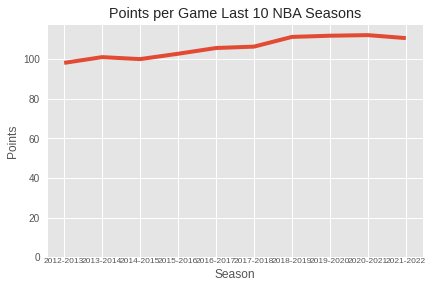

In [71]:
season = league_avg['Season']
points = league_avg['PTS']

plt.style.use('ggplot')

plt.plot(season, points)


plt.title("Points per Game Last 10 NBA Seasons")
plt.xlabel("Season")
plt.ylabel("Points")
plt.ylim(0, 1.05 * max(points))
plt.tick_params(axis='x', pad= .5, labelsize='small')

plt.show()

In [72]:
import plotly.graph_objects as go
px.line(league_avg, x='Season', y='PTS', labels={'x': 'Season', 'y': 'Points'})
fig = go.Figure()
# fig.add_trace(go.Scatter(x=league_avg.Season, y=league_avg.PTS,
#                          mode='lines', name='Points'))
fig.add_trace(go.Scatter(x=league_avg.Season, y=league_avg['FG%'],
                         mode='lines', name='FG%'))
fig.add_trace(go.Scatter(x=league_avg.Season, y=league_avg['3P%'],
                         mode='lines', name='3P%'))

fig.update_yaxes(rangemode="tozero")
fig.update_layout(title='NBA Averages per Game Last 10 Seasons',
                  xaxis_title='Season', yaxis_title='Points')
fig.show(renderer='colab')
#fig.write_html("lst_10_seasons.html")

In [73]:
# nba_stand_21_22 = pd.read_excel('21-22_nba_standings.xlsx')

In [74]:
# nba_stand_21_22.head()

### Win/Loss Data added to nba stats dataframe

In [75]:
# final merged file containing all team stats with win/loss record
nba_data_wl = pd.read_excel('all_nba_data.xlsx')

In [76]:
nba_data_wl.head(3)

,Team,Season,Lookup,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Wins,Losses
0,Denver Nuggets*,2012-2013,2012-2013-Denver Nuggets*,82,242.7,40.7,85.2,0.478,6.4,18.5,0.343,34.4,66.6,0.516,18.4,26.2,0.701,13.3,31.7,45.0,24.4,9.3,6.5,15.3,20.5,106.1,57.0,25.0
1,Houston Rockets*,2012-2013,2012-2013-Houston Rockets*,82,241.2,38.1,82.7,0.461,10.6,28.9,0.366,27.5,53.8,0.511,19.2,25.5,0.754,11.1,32.3,43.4,23.2,8.3,4.4,16.4,20.3,106.0,45.0,37.0
2,Oklahoma City Thunder*,2012-2013,2012-2013-Oklahoma City Thunder*,82,241.8,38.1,79.3,0.481,7.3,19.4,0.377,30.8,60.0,0.514,22.2,26.8,0.828,10.4,33.2,43.6,21.4,8.3,7.6,15.3,20.2,105.7,60.0,22.0


In [77]:
# selects all league average categories for every season
all_seasons = nba_data_wl.loc[nba_data_wl['Team'] == 'League Average']

In [78]:
# selects 3pt and win categories for every season
all_seasons_wins = nba_data_wl[['Season','Team','FGA','FG%','FTA','FT%','3PA','3P%','TRB','AST','PTS','Wins']]

In [79]:
# filters playoff teams and creates dataframe for 2013-2014 season
playoffs_2014 = all_seasons_wins[(all_seasons_wins['Team'].str.contains("\*")) & (all_seasons_wins['Season'] == '2013-2014')]
playoffs_2014.head(20)

,Season,Team,FGA,FG%,FTA,FT%,3PA,3P%,TRB,AST,PTS,Wins
31,2013-2014,Los Angeles Clippers*,82.5,0.474,29.1,0.730,24.0,0.352,43.0,24.6,107.9,57.0
32,2013-2014,Houston Rockets*,80.5,0.472,31.1,0.712,26.6,0.358,45.3,21.4,107.7,54.0
34,2013-2014,Portland Trail Blazers*,87.0,0.450,23.5,0.815,25.3,0.372,46.4,23.2,106.7,54.0
35,2013-2014,Oklahoma City Thunder*,82.7,0.471,25.0,0.806,22.4,0.361,44.7,21.9,106.2,59.0
36,2013-2014,San Antonio Spurs*,83.5,0.486,20.0,0.785,21.4,0.397,43.3,25.2,105.4,62.0
38,2013-2014,Dallas Mavericks*,83.6,0.474,21.1,0.795,22.9,0.384,40.9,23.6,104.8,49.0
40,2013-2014,Golden State Warriors*,85.4,0.462,21.1,0.753,24.8,0.380,45.3,23.3,104.3,51.0
42,2013-2014,Miami Heat*,76.5,0.501,23.0,0.760,22.3,0.364,36.9,22.5,102.2,54.0
43,2013-2014,Toronto Raptors*,81.9,0.445,25.1,0.782,23.4,0.372,42.5,21.2,101.3,48.0
44,2013-2014,Atlanta Hawks*,81.6,0.458,21.7,0.781,25.8,0.363,40.0,24.9,101.0,38.0


In [80]:
# dataframe for 2013-2014 league averages
league_avg_14 = league_avg.loc[league_avg['Season'] == '2013-2014']

In [81]:
league_avg_14.head()

,Team,Season,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
30,League Average,2013-2014,82,242.0,37.7,83.0,0.454,7.7,21.5,0.36,30.0,61.5,0.488,17.8,23.6,0.756,10.9,31.8,42.7,22.0,7.7,4.7,14.6,20.7,101.0


### Free Throw Attempts per Game

In [82]:
# creates labels with team names for horizontal bar charts
labels = playoffs_2014['Team'].to_list()
labels

['Los Angeles Clippers*',
 'Houston Rockets*',
 'Portland Trail Blazers*',
 'Oklahoma City Thunder*',
 'San Antonio Spurs*',
 'Dallas Mavericks*',
 'Golden State Warriors*',
 'Miami Heat*',
 'Toronto Raptors*',
 'Atlanta Hawks*',
 'Washington Wizards*',
 'Brooklyn Nets*',
 'Charlotte Bobcats*',
 'Indiana Pacers*',
 'Memphis Grizzlies*',
 'Chicago Bulls*']

In [83]:
# list of plot styles
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### Free Throw Attempts per Game

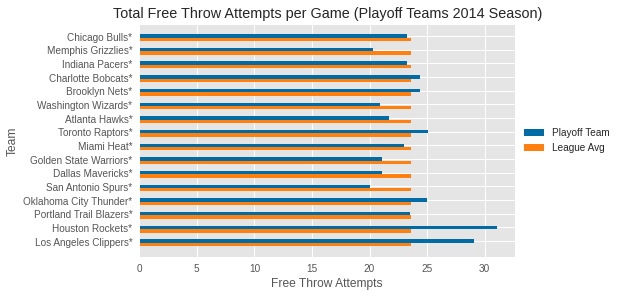

In [84]:
wins_2014 = playoffs_2014['Wins']
season = playoffs_2014['Season']
team = playoffs_2014['Team']

nba_ft_percent = league_avg_14['FT%']
nba_fta = league_avg_14['FTA']
playoff_tm_fta = playoffs_2014['FTA']
playoff_tm_ft_percent = playoffs_2014['FT%']

# creates grouped barcharts
labels = labels
x_indexes = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

plt.style.use('tableau-colorblind10')

# horizontal grouped bar charts
plt.barh(x_indexes, playoff_tm_fta, width, label='Playoff Team')
plt.barh(x_indexes - width, nba_fta, width, label='League Avg')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yticks(ticks=x_indexes, labels=labels)

############ Remember to update title and labels when changing data ################
plt.title("Total Free Throw Attempts per Game (Playoff Teams 2014 Season)")
plt.ylabel("Team")
plt.xlabel("Free Throw Attempts")

plt.show()

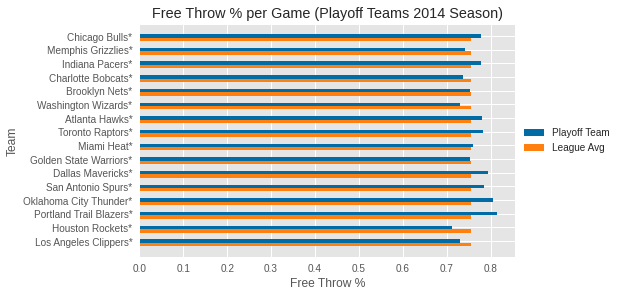

In [85]:
wins_2014 = playoffs_2014['Wins']
season = playoffs_2014['Season']
team = playoffs_2014['Team']

nba_ft_percent = league_avg_14['FT%']
nba_fta = league_avg_14['FTA']
playoff_tm_fta = playoffs_2014['FTA']
playoff_tm_ft_percent = playoffs_2014['FT%']

# grouped bar chart settings
labels = labels
x_indexes = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

plt.style.use('tableau-colorblind10')

# horizontal grouped bar charts
plt.barh(x_indexes, playoff_tm_ft_percent, width, label='Playoff Team')
plt.barh(x_indexes - width, nba_ft_percent, width, label='League Avg')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yticks(ticks=x_indexes, labels=labels)

############ Remember to update title and labels when changing data ################
plt.title("Free Throw % per Game (Playoff Teams 2014 Season)")
plt.ylabel("Team")
plt.xlabel("Free Throw %")

plt.show()

### 3pt% per Game

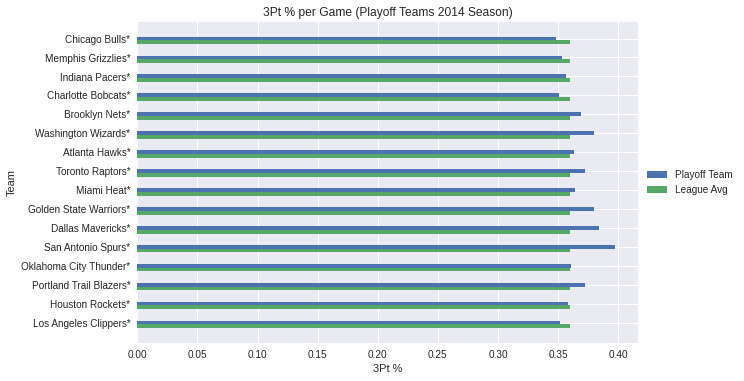

In [86]:
wins_2014 = playoffs_2014['Wins']
season = playoffs_2014['Season']
team = playoffs_2014['Team']

nba_ft_percent = league_avg_14['FT%']
nba_fta = league_avg_14['FTA']
playoff_tm_fta = playoffs_2014['FTA']
playoff_tm_ft_percent = playoffs_2014['FT%']

nba_3pta =league_avg_14['3PA']
nba_3pt_prcnt =league_avg_14['3P%']
playoff_tm_3pta = playoffs_2014['3PA']
playoff_tm_3pt_prcnt = playoffs_2014['3P%']

# grouped bar chart settings
labels = labels
x_indexes = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

x_tick = playoffs_2014['3P%'].to_list()
y = wins_2014

plt.style.use('seaborn')

plt.barh(x_indexes, playoff_tm_3pt_prcnt, width, label='Playoff Team')
plt.barh(x_indexes - width, nba_3pt_prcnt, width, label='League Avg')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yticks(ticks=x_indexes, labels=labels)

############ Remember to update title and labels when changing data ################
plt.title("3Pt % per Game (Playoff Teams 2014 Season)")
plt.ylabel("Team")
plt.xlabel("3Pt %")

plt.show()

### Playoff Team Points per Game

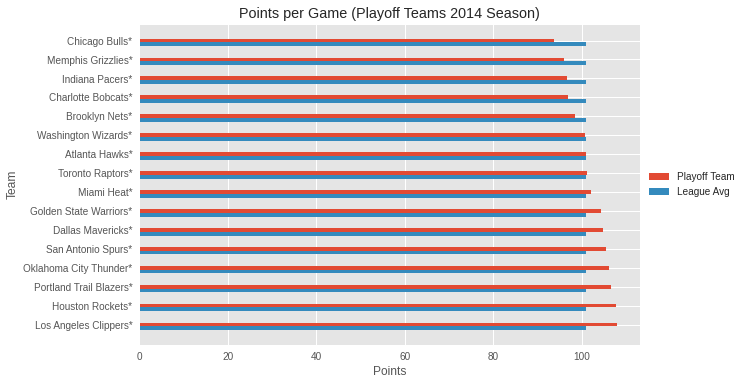

In [87]:
wins_2014 = playoffs_2014['Wins']
season = playoffs_2014['Season']
team = playoffs_2014['Team']

nba_ft_percent = league_avg_14['FT%']
nba_fta = league_avg_14['FTA']
playoff_tm_fta = playoffs_2014['FTA']
playoff_tm_ft_percent = playoffs_2014['FT%']

nba_3pta =league_avg_14['3PA']
nba_3pt_prcnt =league_avg_14['3P%']
playoff_tm_3pta = playoffs_2014['3PA']
playoff_tm_3pt_prcnt = playoffs_2014['3P%']

nba_pts = league_avg_14['PTS']
playoff_tm_pts = playoffs_2014['PTS']

# grouped bar chart settings
labels = labels
x_indexes = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

plt.style.use('ggplot')

plt.barh(x_indexes, playoff_tm_pts, width, label='Playoff Team')
plt.barh(x_indexes - width, nba_pts, width, label='League Avg')

# places legend outside of plot area for visibility
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.yticks(ticks=x_indexes, labels=labels)

############ Remember to update title and labels when changing data ################
plt.title("Points per Game (Playoff Teams 2014 Season)")
plt.ylabel("Team")
plt.xlabel("Points")


plt.show()

## 3PA vs FTA for Playoff Teams

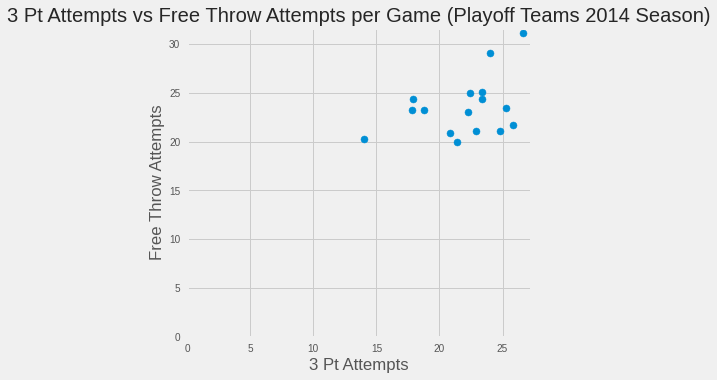

In [88]:
wins_2014 = playoffs_2014['Wins']
season = playoffs_2014['Season']
team = playoffs_2014['Team']

nba_ft_percent = league_avg['FT%']
nba_fta = league_avg['FTA']
playoff_tm_fta = playoffs_2014['FTA']
playoff_tm_ft_percent = playoffs_2014['FT%']
playoff_tm_three_pta = playoffs_2014['3PA']
playoff_tm_three_percent = playoffs_2014['3P%']

x = playoffs_2014['3P%']
y = wins_2014

x_indexes = np.arange(len(playoffs_2014))
width = 0.25

plt.style.use('fivethirtyeight')

# plot 3PA vs FTA
plt.scatter(playoff_tm_three_pta,playoff_tm_fta)
plt.ylim(0)
plt.xlim(0)

############ Remember to update title and labels when changing data ################
plt.title("3 Pt Attempts vs Free Throw Attempts per Game (Playoff Teams 2014 Season)")
plt.ylabel("Free Throw Attempts")
plt.xlabel("3 Pt Attempts")

plt.tight_layout()
plt.show()

### 3PA vs Wins for Playoff Teams

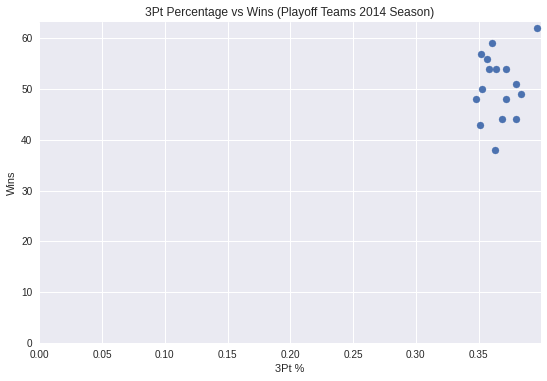

In [89]:
wins_2014 = playoffs_2014['Wins']
season = playoffs_2014['Season']
team = playoffs_2014['Team']

nba_ft_percent = league_avg['FT%']
nba_fta = league_avg['FTA']
playoff_tm_fta = playoffs_2014['FTA']
playoff_tm_ft_percent = playoffs_2014['FT%']
playoff_tm_three_pta = playoffs_2014['3PA']
playoff_tm_three_percent = playoffs_2014['3P%']

x_indexes = np.arange(len(playoffs_2014))
width = 0.25

plt.style.use('seaborn')


# plot 3PA vs FTA
plt.scatter(playoff_tm_three_percent,wins_2014)
plt.ylim(0)
plt.xlim(0)

############ Remember to update title and labels when changing data ################
plt.title("3Pt Percentage vs Wins (Playoff Teams 2014 Season)")
plt.ylabel("Wins")
plt.xlabel("3Pt %")

#plt.tight_layout()

plt.show()

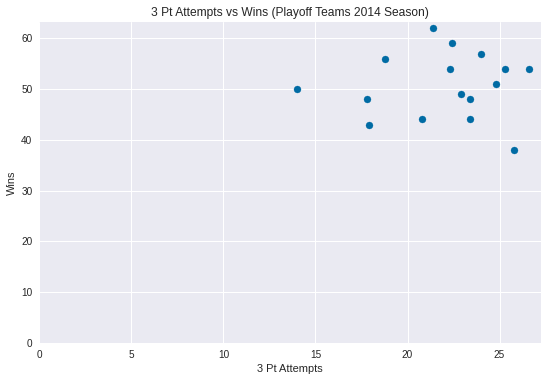

In [90]:
wins_2014 = playoffs_2014['Wins']
season = playoffs_2014['Season']
team = playoffs_2014['Team']
nba_ft_percent = league_avg['FT%']
nba_fta = league_avg['FTA']
playoff_tm_fta = playoffs_2014['FTA']
playoff_tm_ft_percent = playoffs_2014['FT%']
playoff_tm_three_pta = playoffs_2014['3PA']
playoff_tm_three_percent = playoffs_2014['3P%']

x_indexes = np.arange(len(playoffs_2014))
width = 0.25

plt.style.use('tableau-colorblind10')

# plot 3PA vs FTA
plt.scatter(playoff_tm_three_pta,wins_2014)
plt.ylim(0)
plt.xlim(0)

############ Remember to update title and labels when changing data ################
plt.title("3 Pt Attempts vs Wins (Playoff Teams 2014 Season)")
plt.ylabel("Wins")
plt.xlabel("3 Pt Attempts")

plt.show()

In [136]:
# creates dataframe for ALL Playoff Teams
plyff_12_13 = pd.read_csv('12-13_plyff_stats.csv')
plyff_13_14 = pd.read_csv('13-14_plyff_stats.csv')
plyff_14_15 = pd.read_csv('14-15_plyff_stats.csv')
plyff_15_16 = pd.read_csv('15-16_plyff_stats.csv')
plyff_16_17 = pd.read_csv('16-17_plyff_stats.csv')
plyff_17_18 = pd.read_csv('17-18_plyff_stats.csv')
plyff_18_19 = pd.read_csv('18-19_plyff_stats.csv')
plyff_19_20 = pd.read_csv('19-20_plyff_stats.csv')
plyff_20_21 = pd.read_csv('20-21_plyff_stats.csv')
plyff_21_22 = pd.read_csv('21-22_plyff_stats.csv')
plyff_10_seasons = [plyff_12_13, plyff_13_14, plyff_14_15, plyff_15_16, plyff_16_17, plyff_17_18, plyff_18_19, plyff_19_20, plyff_20_21, plyff_21_22]
plyff_5_seasons = [plyff_17_18, plyff_18_19, plyff_19_20, plyff_20_21, plyff_21_22]

# playoffs last 5 years
plyff_df = pd.concat(plyff_5_seasons)
# playoffs last 10 years
plyff_df2 = pd.concat(plyff_10_seasons)

In [137]:
# test last 5 years playoff team dataframe for expected results
plyff_df.tail()

,Tm,Season,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
12,Milwaukee Bucks,2021-2022,12,240.0,38.5,88.0,0.438,10.6,32.3,0.327,27.9,55.7,0.501,15.2,20.8,0.731,9.8,40.7,50.4,20.8,6.3,4.5,13.8,19.2,102.8
13,Utah Jazz,2021-2022,6,240.0,35.0,79.0,0.443,8.2,29.8,0.274,26.8,49.2,0.546,20.8,26.5,0.786,9.3,35.5,44.8,17.2,4.0,3.7,11.8,22.0,99.0
14,Atlanta Hawks,2021-2022,5,240.0,34.4,78.2,0.440,11.4,35.0,0.326,23.0,43.2,0.532,17.2,22.0,0.782,8.6,30.8,39.4,18.6,5.8,2.4,16.4,21.6,97.4
15,Chicago Bulls,2021-2022,5,240.0,36.4,90.2,0.404,10.4,36.8,0.283,26.0,53.4,0.487,12.0,14.4,0.833,8.2,35.8,44.0,23.0,7.8,3.2,13.0,18.6,95.2
16,Playoff Team Average,2021-2022,11,240.3,38.2,83.7,0.456,12.3,34.6,0.355,25.9,49.2,0.527,17.7,22.6,0.785,9.4,32.6,42.0,22.9,7.1,4.6,13.7,21.5,106.3


In [138]:
# selects last 5 years playoff averages from all playoff teams
plyff_avg_5 = plyff_df.loc[plyff_df['Tm'] == 'Playoff Team Average']

In [139]:
# test last 5 years playoff average dataframe
plyff_avg_5

,Tm,Season,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
16,Playoff Team Average,2017-2018,10,241.2,38.4,84.2,0.456,10.5,29.9,0.351,27.9,54.3,0.513,17.2,22.5,0.765,9.2,33.7,42.8,21.8,7.3,4.8,13.2,20.7,104.4
16,Playoff Team Average,2018-2019,10,242.4,38.5,87.0,0.443,11.4,32.9,0.345,27.1,54.0,0.502,19.4,24.7,0.784,10.2,34.8,45.0,23.0,7.0,4.9,13.4,22.2,107.7
16,Playoff Team Average,2019-2020,10,242.1,38.8,85.0,0.457,13.1,36.3,0.360,25.8,48.7,0.529,18.8,23.9,0.788,8.8,34.3,43.2,22.9,7.0,4.3,14.0,21.8,109.6
16,Playoff Team Average,2020-2021,11,241.2,40.2,86.9,0.462,12.5,34.3,0.364,27.7,52.6,0.527,17.5,22.2,0.786,9.9,33.5,43.4,22.0,6.7,4.4,12.2,20.5,110.3
16,Playoff Team Average,2021-2022,11,240.3,38.2,83.7,0.456,12.3,34.6,0.355,25.9,49.2,0.527,17.7,22.6,0.785,9.4,32.6,42.0,22.9,7.1,4.6,13.7,21.5,106.3


In [140]:
plyff_df2.head(5)

,Tm,Season,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Denver Nuggets,2012-2013,6,240.0,37.2,84.8,0.438,7.0,22.5,0.311,30.2,62.3,0.484,21.7,29.7,0.730,11.8,26.8,38.7,21.2,9.0,2.8,14.5,23.2,103.0
1,Golden State Warriors,2012-2013,12,246.3,39.0,84.4,0.462,8.7,22.3,0.388,30.3,62.1,0.489,16.0,21.8,0.736,11.5,34.6,46.1,21.7,6.4,4.9,16.5,23.8,102.7
2,San Antonio Spurs,2012-2013,21,247.1,38.0,82.2,0.463,7.9,20.8,0.378,30.2,61.4,0.492,16.4,21.5,0.763,9.7,32.9,42.6,21.9,7.9,5.0,12.9,19.1,100.3
3,Houston Rockets,2012-2013,6,240.0,34.3,81.0,0.424,11.7,33.7,0.347,22.7,47.3,0.479,19.7,27.7,0.711,10.8,32.7,43.5,18.0,5.8,5.5,15.8,23.2,100.0
4,Brooklyn Nets,2012-2013,7,250.7,37.0,83.7,0.442,6.1,19.4,0.316,30.9,64.3,0.480,19.3,25.4,0.758,11.7,30.4,42.1,19.9,6.3,5.6,11.6,19.9,99.4


In [142]:
# selects last 10 years playoff averages from all playoff teams
plyff_avg_10 = plyff_df2.loc[plyff_df2['Tm'] == 'Playoff Team Average']

In [143]:
# test last 10 years playoff averages
plyff_avg_10.head()

,Tm,Season,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
16,Playoff Team Average,2012-2013,11,243.5,35.0,79.4,0.441,7.1,20.6,0.344,27.9,58.8,0.475,18.1,24.0,0.751,10.5,30.8,41.3,19.3,7.0,4.8,13.8,22.2,95.2
16,Playoff Team Average,2013-2014,11,242.5,36.4,80.0,0.455,8.0,22.3,0.358,28.3,57.6,0.492,18.8,24.7,0.763,10.2,30.9,41.1,19.8,7.1,4.4,13.3,22.0,99.5
16,Playoff Team Average,2014-2015,10,242.8,36.8,84.5,0.435,8.8,25.5,0.344,28.0,59.0,0.475,18.1,25.0,0.725,11.0,34.0,45.0,21.8,7.6,5.4,13.5,21.9,100.5
16,Playoff Team Average,2015-2016,11,241.5,36.5,83.1,0.440,9.1,25.8,0.354,27.4,57.3,0.478,17.6,23.6,0.747,10.5,32.5,43.0,19.9,7.3,5.0,13.2,21.1,99.8
16,Playoff Team Average,2016-2017,10,240.9,38.5,83.7,0.460,10.5,29.1,0.361,28.0,54.6,0.513,18.5,23.8,0.776,9.7,32.1,41.8,22.2,7.6,4.7,13.3,20.8,106.0


In [167]:
import plotly.graph_objects as go
# px.line(league_avg, x='Season', y='PTS', labels={'x': 'Season', 'y': 'Points'})
fig = go.Figure()
# fig.add_trace(go.Scatter(x=league_avg.Season, y=league_avg.PTS,
#                          mode='lines', name='Points'))
fig.add_trace(go.Scatter(x=league_avg.Season, y=league_avg['FG%'],
                         mode='lines+markers', name='Reg Season FG%'))
fig.add_trace(go.Scatter(x=plyff_avg_10.Season, y=plyff_avg_10['FG%'],
                         mode='lines+markers', name='Playoff FG%'))
fig.add_trace(go.Scatter(x=league_avg.Season, y=league_avg['3P%'],
                         mode='lines+markers', name='Reg Season 3P%'))
fig.add_trace(go.Scatter(x=plyff_avg_10.Season, y=plyff_avg_10['3P%'],
                         mode='lines+markers', name='Playoff 3P%'))
fig.add_trace(go.Scatter(x=league_avg.Season, y=league_avg['2P%'],
                         mode='lines+markers', name='Reg Season 2P%'))
fig.add_trace(go.Scatter(x=plyff_avg_10.Season, y=plyff_avg_10['2P%'],
                         mode='lines+markers', name='Playoff 2P%'))
# fig.add_trace(go.Scatter(x=league_avg.Season, y=league_avg['FT%'],
#                          mode='lines+markers', name='Reg Season FT%'))
# fig.add_trace(go.Scatter(x=plyff_avg_10.Season, y=plyff_avg_10['FT%'],
#                          mode='lines+markers', name='Playoff FT%'))

fig.update_yaxes(rangemode="tozero")
fig.update_layout(title='NBA Reg Season vs Playoffs Last 10 Seasons',
                  xaxis_title='Season', yaxis_title='Shooting %', title_x=0.5)
fig.show(renderer='colab')
#fig.write_html("lst_10_seasons.html")

### Regular Season vs Playoffs Rebounds

In [164]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Bar(x=league_avg.Season, y=league_avg['TRB'],
                         name='Reg Season'))
fig.add_trace(go.Bar(x=plyff_avg_10.Season, y=plyff_avg_10['TRB'],
                         name='Playoffs'))

fig.update_yaxes(rangemode="tozero")
fig.update_layout(title='NBA Reg Season vs Playoffs Last 10 Seasons',
                  xaxis_title='Season', yaxis_title='Per Game Average', title_x=0.5,
                  barmode='group')
fig.show(renderer='colab')
#fig.write_html("lst_10_seasons.html")

### Regular Season vs Playoffs Turnovers

In [163]:
import plotly.graph_objects as go
# px.line(league_avg, x='Season', y='PTS', labels={'x': 'Season', 'y': 'Points'})
fig = go.Figure()

fig.add_trace(go.Bar(x=league_avg.Season, y=league_avg['TOV'],
                         name='Reg Season'))
fig.add_trace(go.Bar(x=plyff_avg_10.Season, y=plyff_avg_10['TOV'],
                         name='Playoffs'))

fig.update_yaxes(rangemode="tozero")
fig.update_layout(title='NBA Reg Season vs Playoffs Last 10 Seasons',
                  xaxis_title='Season', yaxis_title='Per Game Average', title_x=0.5,
                  barmode='group')
fig.show(renderer='colab')
#fig.write_html("lst_10_seasons.html")

# References

* https://stackoverflow.com/questions/57906797/scatter-graphs-y-axis-always-starting-at-0
* https://stackoverflow.com/questions/48376580/google-colab-how-to-read-data-from-my-google-drive
* https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
* https://www.basketball-reference.com/playoffs/NBA_2022.html (going back 10 seasons 2012-2022)
* https://plotly.com/python/
* https://plotly.com/python/getting-started/
* https://stackoverflow.com/questions/52956228/how-to-plot-using-plotly-with-offline-mode-out-not-in-ipython-notebooks
* https://www.youtube.com/watch?v=GGL6U0k8WYA&t=805s
* https://stackoverflow.com/questions/61233041/module-not-found-error-no-module-named-chart-studio
* https://stackoverflow.com/questions/57906797/scatter-graphs-y-axis-always-starting-at-0
* https://community.plotly.com/t/title-alignment-python/30820
* https://plotly.com/python/reference/layout/
* https://plotly.com/python/bar-charts/#grouped-bar-chart